# TKT4108 Structural dynamics 2

## Exercise 1

**Main topics:** Repetition of fundamental structural dynamics

**References:** Lecture notes from TKT 4201 Structural Dynamics 1

### Problem 1: Dynamic response for a single degree of freedom




**a)**

We consider the beam in a deflected state. Moment equilibrium around A yields:

$$ - \frac{1}{3}mL \cdot L^2 \frac{\ddot{u}}{L} - \frac{1}{3}mL\cdot L \ddot{u} - c \frac{3L}{4} \frac{3}{4} \dot{u} -k \frac{3L}{4} \frac{3}{4} u + p(t) L =0 $$

$$ \frac{2mL}{3} \ddot{u} + \frac{9c}{16} \dot{u} + \frac{9k}{16} u  = p(t) $$

We can also write the equation on generalized form:

$$ m^*\ddot{u} + c^* \dot{u} + k^* u  = p(t), \quad m^*=\frac{2mL}{3}, c^*=\frac{9c}{16}, k^*=\frac{9k}{16} $$

where $m^*$, $c^*$, and $k^*$ are the generalized mass, dampness and stiffness:

**b)**

$$ \omega_n=\sqrt{\dfrac{k^*}{m^*}}=\sqrt{\dfrac{9k/16}{2mL/3}}=\sqrt{\dfrac{27}{32} \dfrac{k}{mL}}=9.18 \text{ rad/s} $$ 

**c)**

We mass normalize the equation by dividing by the term in front of the acceleration, $m^*$:

$$  \ddot{u} +  2 \omega_n \xi \dot{u} + \omega_n^2 u  = \frac{1}{m^*} p(t) $$

Here, the term in front of $\dot{u}$ is also given by $ \dfrac{ 9c/16 }{m^*}$:

$$ 2 \omega_n \xi = \dfrac{ 9c/16 }{m^*} =\dfrac{27}{32} \dfrac{c}{mL} $$

By setting $\xi=0.02$, $c$ can be solved as:

$$ c= 2 \omega_n \xi \dfrac{32}{27}mL = 435 \text{  N/(m/s)}$$

**d)**

The load can be written as $p(t)=p_0 \cos(\Omega t) = \Re \big( p_0 \exp(i\Omega t) \big)$. We assume that the steady state response is harmonic $u(t)=\Re \big( G  \exp(i\Omega t) \big)$, where $G$ is a complex amplitude. The derivatives are $\dot{u}=\Re \big( i\Omega  G  \exp(i\Omega t) \big)$ and $\ddot{u}=\Re \big( -\Omega^2  G  \exp(i\Omega t) \big)$. We insert this into the equation of motion:

$$ \Re \big(  G( -\Omega^2 +  i \Omega 2 \omega_n \xi + \omega_n^2 ) \exp(i\Omega t)  \big) = \Re \big( \dfrac{p_0}{m^*} \exp(i\Omega t) \big) $$

$G$ can be found as:

$$  G=\dfrac{p_0}{m^*} \cdot \dfrac{1}{-\Omega^2 +  i \Omega 2 \omega_n \xi + \omega_n^2 }=\dfrac{p_0}{\omega_n^2 m^*} \cdot \dfrac{1}{1-\beta^2 +  i 2 \beta \xi} $$

where $\beta=\dfrac{\Omega}{\omega_n}$ is the frequency ratio. The complex number in the denominator can be written on exponential form:

$$
(1-\beta^2 +  i 2 \beta \xi )=\sqrt{(1-\beta^2)^2 + (2 \beta \xi)^2} \exp(i\phi)$$

where the phase angle is:

$$\tan(\phi)=\dfrac{2 \beta \xi}{1-\beta^2}$$

This can be substituted into $G$:

$$  G=\dfrac{p_0}{\omega_n^2 m^*} \cdot \dfrac{1}{ \sqrt{(1-\beta^2)^2 + (2 \beta \xi)^2} \exp(i\phi)}=\dfrac{p_0}{\omega_n^2 m^*} D(\beta)\exp(-i\phi) 
$$

where $D(\beta)=\dfrac{1}{ \sqrt{(1-\beta^2)^2 + (2 \beta \xi)^2 }}$ is the dynamic amplification factor. The response can be found as:

$$ u(t)=\Re \big( G  \exp(i\Omega t) \big) = \Re \big( \dfrac{p_0}{\omega_n^2 m^*} D(\beta)\exp(-i\phi)  \exp(i\Omega t) \big) = 
\Re \big( \dfrac{p_0}{\omega_n^2 m^*} D(\beta)  \exp(i (\Omega t-\phi) \big) = \dfrac{p_0}{\omega_n^2 m^*} D(\beta) \cos(\Omega t-\phi)$$

We find that $\dfrac{p_0}{\omega_n^2 m^*}=\dfrac{p_0}{k^*}=0.0178$ m. The frequency ratio is $\beta=0.65$, and the dynamic amplification factor is $D(\beta=0.65)=1.73$. The steady state response amplitude is therefore $0.0178 \cdot 1.73=0.031$ m.



**e)**

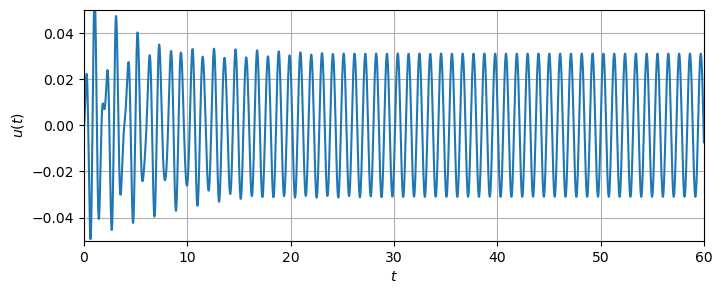

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(r'../../modules')
from time_integration import * # Import all functions in the module time_integration

# Parameters
m=100.0
L=10.0
k=1e5
c=435.0

# Generalized stiffness, damping and mass terms
k_star=9/16*k
c_star=9/16*c
m_star=2/3*m*L

# Time axis
dt=0.01
T=60
t=np.arange(0,T+dt,dt)

# Load
p0=1e3
omega=6.0
p=p0*np.cos(omega*t)

# Initial conditions
u0=0.0
udot0=0.0

u, udot, uddot = linear_newmark_krenk(m_star,c_star,k_star,p,u0,udot0,dt)

plt.figure(figsize=(8,3))
plt.plot(t,u[0,:]);

plt.ylabel(r'$u(t)$')
plt.xlabel(r'$t$')
plt.xlim(0, 60)
plt.ylim(-0.05, 0.05)
plt.grid()

In [2]:
# Max displacement at steady state
print('Steady state amplitude is ' + "{:.4f}".format(np.max(u[0,-100:])))

Steady state amplitude is 0.0310


We observe that the steady state response matches the calculation in question d).

**f)**

If we neglect all velocity and acceleration terms from the equation of motion, we find the quasi-static response:

$$ k^* u(t)  = p(t) $$

$$ u(t)  = \dfrac{p(t)}{k^*} = \dfrac{p_0}{k^*}  \cos(\Omega t) $$

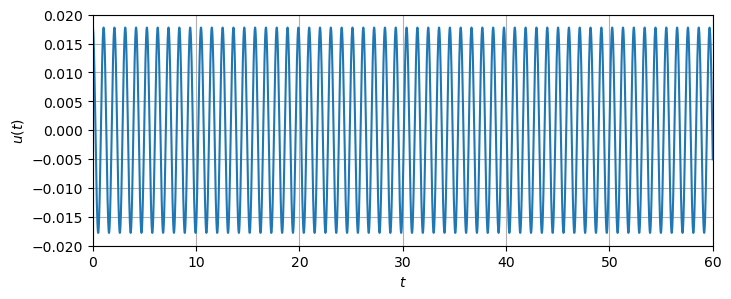

In [3]:
# Quasi static response
u_qs=p0/k_star*np.cos(omega*t)

plt.figure(figsize=(8,3))
plt.plot(t,u_qs);

plt.ylabel(r'$u(t)$')
plt.xlabel(r'$t$')
plt.xlim(0, 60)
plt.ylim(-0.02, 0.02)
plt.grid()

We observe two things:

$i)$ There is no transient phase in the beginning. When inertia and damping is disregarded, the system responds to the load without any delay.

$ii)$ The response in the dynamic analysis is greater by a factor of $\dfrac{0.031}{0.018}=1.72$ due to the dynamic magnification.


**g)**

Let's plot the dynamic magnification $D(\beta)$.

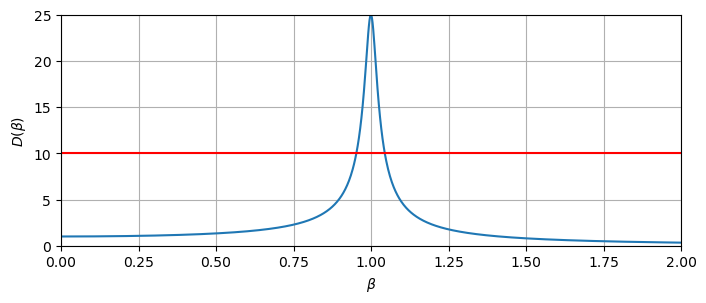

In [4]:
beta_axis=np.linspace(0,2,1000)

xi=0.02

D=1/np.sqrt((1-beta_axis**2)**2+(2*xi*beta_axis)**2)

plt.figure(figsize=(8,3))
plt.plot(beta_axis,D)

plt.ylabel(r'$D(\beta)$')
plt.xlabel(r'$\beta$')
plt.xlim(0, 2)
plt.ylim(0, 25)
plt.grid()

plt.axhline(y=10,color='r')


We see that the dynamic magnification would be equal to $10$ for $\beta\approx 0.95$, so the load frequency would have to be $\Omega=0.95 \omega_n=8.7$ rad/s.

### Problem 2: Dynamic response for multiple degrees of freedom

**a)**

We consider element-by-element to find the contributions to the items of $\mathbf{K}$ and $\mathbf{M}$: 

Element 1 (left span): $k_{11}=\dfrac{4EI}{L}, k_{22}=\dfrac{4EI}{L}, k_{12}=\dfrac{2EI}{L}$ $, \quad \quad$ $m_{11}=\dfrac{4mL^3}{420}, m_{22}=\dfrac{4mL^3}{420}, m_{12}=\dfrac{-3mL^3}{420}$

Element 2 (mid span): $k_{22}=\dfrac{4EI}{2L}, k_{33}=\dfrac{4EI}{2L}, k_{23}=\dfrac{2EI}{2L}$ $, \quad \quad$ $m_{22}=\dfrac{4m(2L)^3}{420}, m_{33}=\dfrac{4m(2L)^3}{420}, m_{23}=\dfrac{-3m(2L)^3}{420}$

Element 3 (right span): $k_{33}=\dfrac{4EI}{L}, k_{44}=\dfrac{4EI}{L}, k_{34}=\dfrac{2EI}{L}$ $, \quad \quad$
$m_{33}=\dfrac{4mL^3}{420}, m_{44}=\dfrac{4mL^3}{420}, m_{34}=\dfrac{-3mL^3}{420}$

Element 4 (left column): $k_{22}=\dfrac{4EI/4}{L}$ $, \quad \quad$ $m_{22}=\dfrac{4(m/4)L^3}{420}$

Element 5 (right column): $k_{33}=\dfrac{4EI/4}{L}$ $, \quad \quad$ $m_{33}=\dfrac{4(m/4)L^3}{420}$

$$ \mathbf{K} = 
\dfrac{EI}{L}
\left[ \begin{array}{cccc} 
4 & 2 & 0 & 0 \\
2 & 7 & 1 & 0 \\
0 & 1 & 7 & 2 \\
0 & 0 & 2 & 4 
\end{array}   \right]  $$

$$ \mathbf{M} = 
\dfrac{mL^3}{420}
\left[ \begin{array}{cccc} 
4 & -3 & 0 & 0 \\
-3 & 37 & -24 & 0 \\
0 & -24 & 37 & -3 \\
0 & 0 & -3 & 4 
\end{array}   \right]  $$


We can calculate the natural frequencies and mode shapes:

In [10]:
import numpy as np
import scipy

# Parameters
m=1000
L=10
EI=1e8

# Stiffness
K=np.array([   
[ 4 , 2 , 0 , 0],
[2 , 7 , 1 , 0],
[0 , 1 , 7 , 2],
[0 , 0 , 2 , 4 ]
])*EI/L

# Mass
M=np.array([   
[4 , -3 , 0 , 0 ],
[-3 , 37 , -24 , 0 ],
[0 , -24 , 37 , -3 ],
[0 , 0 , -3 , 4 ]
])*m*L**3/420

# Solve the eigenvalue problem
eigval, eigvec = scipy.linalg.eig(K, M)

# Sorting order (min to max)
idx_sort=np.argsort(eigval)

# Natural frequencies
omega_n=np.real(np.sqrt(eigval[idx_sort]))

# Mode shapes (scaled to max 1)
q=eigvec[:,idx_sort]
q=q/q.max(axis=0)

print("Natural frequencies in rad/s:")
print(omega_n)

print("Eigenvectors:")
print(q)


Natural frequencies in rad/s:
[17.90336521 38.06413156 68.43774422 89.0385651 ]
Eigenvectors:
[[ 0.60327781  1.         -1.          1.        ]
 [-1.         -0.86332496 -0.08618254  0.46332496]
 [ 1.         -0.86332496  0.08618254  0.46332496]
 [-0.60327781  1.          1.          1.        ]]


<img src="Modes.jpg">


**c)**

The Rayleigh damping is defined as $\mathbf{C}=\alpha \mathbf{M}+\beta \mathbf{K}$. We pre- and post-multiply by the mode shape vector $\mathbf{\phi}$:

$$\mathbf{\phi}^\text{T} \mathbf{C}\mathbf{\phi} =\alpha \mathbf{\phi}^\text{T}\mathbf{M}\mathbf{\phi}+\beta \mathbf{\phi}^\text{T}\mathbf{K}\mathbf{\phi}$$

$$c^*=m^* 2 \xi \omega_n =\alpha m^*+\beta k^*$$

Divide by the generalized mass:

$$\dfrac{c^*}{m^*}=2 \xi \omega_n =\alpha +\beta \omega_n^2$$

Solve for the damping:

$$ \xi  =\dfrac{\alpha}{2\omega_n}+ \dfrac{\beta \omega_n}{2}$$

The coefficients can be found by considering two target natural frequencies $\omega_{n,1}$ and $\omega_{n,2}$ with damping ratios 
$\xi_1$ and $\xi_2$. This can be formulated in a $2\times2$ matrix form:

$$ \begin{bmatrix}
\xi_1 \\
\xi_2
\end{bmatrix}
=
\begin{bmatrix}
1/(2\omega_{n,1}) & {\omega_{n,1}/2} \\
1/(2\omega_{n,2}) & {\omega_{n,2}/2} \\
\end{bmatrix}
 \begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}
$$

$\alpha$ and $\beta$ are found by solving this equation.

In [6]:
# Natural  frequencies
omega1=omega_n[0]
omega2=omega_n[1]
omega3=omega_n[2]
omega4=omega_n[3]

# Target damping ratios
xi1=1.5/100
xi4=1.5/100
xi=np.array([[xi1],[xi4]])

# Set up 2x2 matrix
A=np.array([[1/(2*omega1),omega1/2],[1/(2*omega4),omega4/2]])

# Solve matrix system by inverse
alpha_beta=np.linalg.inv(A)@xi

# Get alpha and beta
alpha,beta=alpha_beta[0,0],alpha_beta[1,0]

# Re-calculate the damping for all modes
xi1=alpha/(2*omega1)+beta*omega1/2
xi2=alpha/(2*omega2)+beta*omega2/2
xi3=alpha/(2*omega3)+beta*omega3/2
xi4=alpha/(2*omega4)+beta*omega4/2

print('alpha=' + '{0:.2e}'.format(alpha))
print('beta=' + '{0:.2e}'.format(beta))

print('Damping ratio 1 is ' + '{0:.2f}'.format(xi1*100) + '%')
print('Damping ratio 2 is ' + '{0:.2f}'.format(xi2*100) + '%')
print('Damping ratio 3 is ' + '{0:.2f}'.format(xi3*100) + '%')
print('Damping ratio 4 is ' + '{0:.2f}'.format(xi4*100) + '%')

alpha=4.47e-01
beta=2.81e-04
Damping ratio 1 is 1.50%
Damping ratio 2 is 1.12%
Damping ratio 3 is 1.29%
Damping ratio 4 is 1.50%


As expected, the damping in mode 1 and 4 is 1.5%. For mode 2 and 3 they are slightly less. We can confirm by a graphical solution.

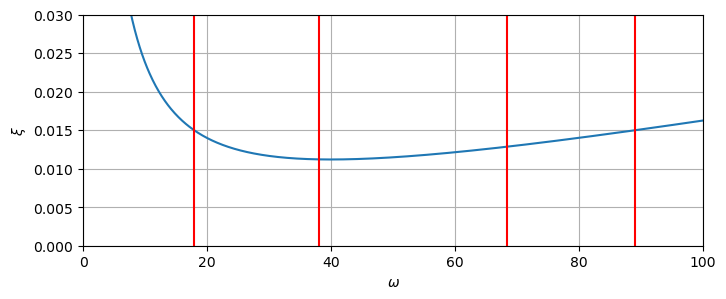

In [14]:
# Frequency axis
omega_axis=np.linspace(1,100,1000)

# Rayleigh damping
xi_rayleigh=alpha/(2*omega_axis)+beta*omega_axis/2

# Plot Rayleigh damping
plt.figure(figsize=(8,3))
plt.plot(omega_axis,xi_rayleigh)

plt.ylabel(r'$\xi$')
plt.xlabel(r'$\omega$')
plt.xlim(0, 100)
plt.ylim(0, 0.03)
plt.grid()

# Plot natural frequencies
plt.axvline(x=omega1,color='r')
plt.axvline(x=omega2,color='r')
plt.axvline(x=omega3,color='r')
plt.axvline(x=omega4,color='r')

**d)**

The highest mode has natural frequency $\omega_{n,4}\approx 89$ rad/s, so the period is $T_4=\dfrac{2\pi}{\omega_{n,4}}=\dfrac{2\pi}{89}=0.07$ s. This means that $\Delta t=\dfrac{0.07}{20}=0.0035$ s. We round down and set $\Delta t=0.003$ s for simplicity.




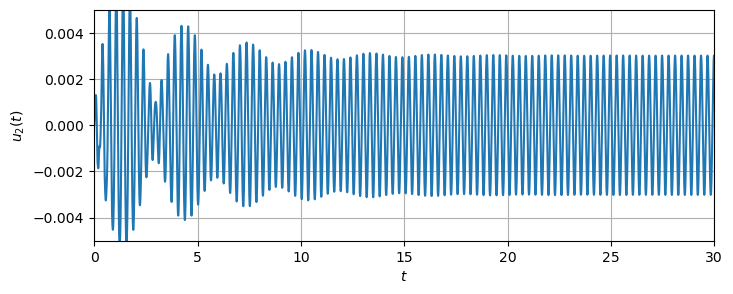

In [8]:
# Time axis
dt=0.003
T=30
t=np.arange(0,T+dt,dt)

# Damping
C=alpha*M+beta*K

# Load
p0=1e5
omega=20.0
p2=p0*np.cos(omega*t) # Load in DOF 2

p=np.vstack((0*p2,p2,0*p2,0*p2)) # Load vector for all DOF

# Initial conditions
u0=np.array([[0],[0],[0],[0]])
udot0=np.array([[0],[0],[0],[0]])

# Find response by Newmark integration
u, udot, uddot = linear_newmark_krenk(M,C,K,p,u0,udot0,dt)

# Plot DOF 2
plt.figure(figsize=(8,3))
plt.plot(t,u[1,:]);

plt.ylabel(r'$u_2(t)$')
plt.xlabel(r'$t$')
plt.xlim(0, 30)
plt.ylim(-0.005, 0.005)
plt.grid()

**e)**

The finite element theory assumes the response of the element can be interpolated by Hermittian shape functions times the response in the DOFs at the nodes. The displacement response in the middle element is: 

$$ v_{mid}(t)= u_2(t) H_2(x=0.5 L_e)+ u_3(t) H_4(x=0.5 L_e)$$

Here, $H_2(x)$ and $H_4(x)$ for $x \in [0,L_e]$ are the element shape functions that have slopes equal to 1 in the left and right nodes of the element. 

$$H_2(x)=-x(1-2\dfrac{x}{L_e}+\dfrac{x^2}{L_e^2}), \quad H_4(x)=x(\dfrac{x}{L_e}-\dfrac{x^2}{L_e^2}) $$

Therefore, at $x=0.5 L_e=L$:

$$ v_{mid}(t)= -\dfrac{L}{4} u_2(t) +\dfrac{L}{4}u_3(t)$$
